### Mercedes-Benz Greener Manufacturing

The goal of this project is to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

### Steps to be performed:

##### 1. For any column(s), if the variance is equal to zero, then remove those variable(s).
##### 2. Check for null and unique values for test and train sets.
##### 3. Apply label encoder.
##### 4. Perform dimensionality reduction.
##### 5. split train and test dataset
##### 6. Use RandomizedSearchCV and GridSearchCV for hyperparameter tunning.
##### 7. Perform k-fold validation.
##### 8. Prediction on test dataset using XGBoost.
##### 9. Plot actual target values of train dataset and predicted target values of test dataset.
##### 10. Plot feature importance.

### 1. If for any column(s), the variance is equal to zero, then remove those variable(s).

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

train_data_file = 'Data\\train.csv'
test_data_file = 'Data\\test.csv'
train_dataset = pd.read_csv(train_data_file)
test_dataset = pd.read_csv(test_data_file)

In [65]:
train_dataset.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [66]:
test_dataset.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [68]:
train_dataset.dtypes

ID        int64
y       float64
X0       object
X1       object
X2       object
         ...   
X380      int64
X382      int64
X383      int64
X384      int64
X385      int64
Length: 378, dtype: object

In [69]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [70]:
test_dataset.dtypes

ID       int64
X0      object
X1      object
X2      object
X3      object
         ...  
X380     int64
X382     int64
X383     int64
X384     int64
X385     int64
Length: 377, dtype: object

In [71]:
# Identfy train dataset columns which are object types
object_cols = []
for idx in train_dataset.dtypes.index :
    if train_dataset.dtypes[idx] == 'object' :
        object_cols.append(idx)
print("Columns with object type: ", object_cols)

# Identfy columns of int or float type except for the column "y"
train_numeric_cols = []
train_numeric_cols = [col for col in train_dataset if col not in object_cols and col!='y']

Columns with object type:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [72]:
train_dataset.iloc[:,:12].dtypes

ID       int64
y      float64
X0      object
X1      object
X2      object
X3      object
X4      object
X5      object
X6      object
X8      object
X10      int64
X11      int64
dtype: object

In [73]:
# Identfy  test dataset columns which are object types
object_cols = []
for idx in test_dataset.dtypes.index :
    if test_dataset.dtypes[idx] == 'object' :
        object_cols.append(idx)
print("Columns with object type: ", object_cols)

# Identfy columns of int or float type
test_numeric_cols = []
test_numeric_cols = [col for col in test_dataset if col not in object_cols]

Columns with object type:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [74]:
# Identify common numeric columns between train and test dataset.

common_numeric_cols = [col for col in test_dataset if col in train_numeric_cols]
print('# of columns in train dataset: {:d}, # of columns in test dataset: {:d}'
      .format(train_dataset.shape[1], test_dataset.shape[1]))
print('# of common object columns: {:d}'.format(len(object_cols)))
print('# of common numeric columns: {:d}'.format(len(common_numeric_cols)))

# of columns in train dataset: 378, # of columns in test dataset: 377
# of common object columns: 8
# of common numeric columns: 369


In [75]:
test_dataset.iloc[:,:12].dtypes

ID      int64
X0     object
X1     object
X2     object
X3     object
X4     object
X5     object
X6     object
X8     object
X10     int64
X11     int64
X12     int64
dtype: object

In [76]:
# identify variable with 0 variance

var_train_df = pd.DataFrame(np.var(train_dataset[train_numeric_cols], axis=None), columns=['variance'])

In [77]:
var_train_df.sort_values(by='variance').head(20)

,variance
X233,0.000000
X347,0.000000
X293,0.000000
X290,0.000000
X289,0.000000
X93,0.000000
X297,0.000000
X330,0.000000
X235,0.000000
X11,0.000000


In [78]:
var_test_df = pd.DataFrame(np.var(test_dataset[test_numeric_cols], axis=None), columns=['variance'])
var_test_df.sort_values(by='variance').head(10)

,variance
X369,0.000000
X257,0.000000
X295,0.000000
X258,0.000000
X296,0.000000
X288,0.000238
X290,0.000238
X293,0.000238
X210,0.000238
X330,0.000238


In [79]:
var_train_df = var_train_df[var_train_df['variance'] == 0]
var_test_df = var_test_df[var_test_df['variance'] == 0]

In [80]:
print("Columns with 0 variance in train dataset:", var_train_df.index)
print("Column count :", var_train_df.shape[0])
print("Columns with 0 variance in test dataset:", var_test_df.index)
print("Column count :", var_test_df.shape[0])

Columns with 0 variance in train dataset: Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')
Column count : 12
Columns with 0 variance in test dataset: Index(['X257', 'X258', 'X295', 'X296', 'X369'], dtype='object')
Column count : 5


In [81]:
var_z_list = []
for x in var_train_df.index :
    var_z_list.append(x)
for x in var_test_df.index :
    var_z_list.append(x)

In [82]:
print("Columns with 0 variance in total dataset:", np.sort(var_z_list))
print("Column count :", len(var_z_list))

Columns with 0 variance in total dataset: ['X107' 'X11' 'X233' 'X235' 'X257' 'X258' 'X268' 'X289' 'X290' 'X293'
 'X295' 'X296' 'X297' 'X330' 'X347' 'X369' 'X93']
Column count : 17


In [83]:
train_dataset.drop(var_z_list, axis=1, inplace=True)
test_dataset.drop(var_z_list, axis=1, inplace=True)

In [84]:
train_dataset.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [85]:
test_dataset.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [86]:
# Identify common numeric columns between train and test dataset.

common_numeric_cols = [col for col in test_dataset if col in train_numeric_cols]
print('# of columns in train dataset: {:d}, # of columns in test dataset: {:d}'
      .format(train_dataset.shape[1], test_dataset.shape[1]))
print('# of common object columns: {:d}'.format(len(object_cols)))
print('# of common numeric columns: {:d}'.format(len(common_numeric_cols)))

# of columns in train dataset: 361, # of columns in test dataset: 360
# of common object columns: 8
# of common numeric columns: 352


### 2. Check for null and unique values for test and train sets.

In [87]:
train_dataset.shape

(4209, 361)

In [88]:
test_dataset.shape

(4209, 360)

In [89]:
# The function to find the columns which has nulls more than 70% of totoal rows
def check_null_percetage_n_count() :
    is_null = False
    null_percentage = 70
    for data in [train_dataset, test_dataset]:
        print("....Checking dataset")
        for x in data.columns :    
            null_count = data[x].isna().sum()
            null_p = data[x].isna().sum()/data.shape[0]*100
            if (null_p >= null_percentage) :
                is_null = True
                print('More than {:d} % of nulls : {:s} {:.2f} %'
                      .format(null_percentage, x, null_p))
            elif (null_count > 0) :
                is_null = True
                print('Null count : {:s} {:d}(count)'.format(x, null_count))
            else :
                is_null = False
        if (is_null == False) :
            print('There is no null values')

In [90]:
check_null_percetage_n_count()

....Checking dataset
There is no null values
....Checking dataset
There is no null values


In [91]:
train_dataset['X12'].unique()

array([0, 1], dtype=int64)

In [92]:
# check unique values of numeric columns for train and test dataset.
# Skip object columns because I will LabelEncoding later for object columns.
# Check if common numeric columns of train and test dataset have other values except for 0 and 1.
flag = True
for data in [train_dataset, test_dataset] :
    print("....Checking Train/Test Dataset for numeric columns: ....")
    for x in data[common_numeric_cols] :
        for y in zip( np.sort(data[x].unique()), [0,1]) :
            #print(x)
            if (y[0] != y[1]) :
                flag = False
        if flag == False :
            print('Column \"{:s}\" has values other values other than 0 or 1'.format(x))
            flag = True
    print('All the other columns have column values 0 or 1\n')

....Checking Train/Test Dataset for numeric columns: ....
Column "ID" has values other values other than 0 or 1
All the other columns have column values 0 or 1

....Checking Train/Test Dataset for numeric columns: ....
Column "ID" has values other values other than 0 or 1
All the other columns have column values 0 or 1



### 3. Apply label encoder

In [93]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 361 entries, ID to X385
dtypes: float64(1), int64(352), object(8)
memory usage: 11.6+ MB


In [94]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 360 entries, ID to X385
dtypes: int64(352), object(8)
memory usage: 11.6+ MB


In [95]:
# Drop ID column
train_dataset.drop('ID', axis=1, inplace=True)
test_dataset.drop('ID', axis=1, inplace=True)

In [96]:
train_dataset.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Apply LabelEncoder for object columns on Train and Test dataset
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for data in [train_dataset, test_dataset] :
    for col in object_cols :
        le_fit = le.fit_transform(data[col])
        data[col] = le_fit

### 4. Perform dimensionality reduction using PCA

In [98]:
train_dataset.shape

(4209, 360)

In [99]:
test_dataset.shape

(4209, 359)

In [100]:
train_dataset.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
from sklearn.decomposition import PCA

# can not be larger than min(n_features, n_classes - 1)

df_x_train = train_dataset.drop(['y'], axis=1)
df_y_train = train_dataset['y']

In [102]:
# Check the number of componets for PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df_x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print("Number of component for PCA:", np.argmax(cumsum >= 0.95) + 1)

Number of component for PCA: 6


In [103]:
pca_dr = PCA(n_components = 0.95, random_state=7)
pca_dr.fit(df_x_train)

PCA(n_components=0.95, random_state=7)

In [104]:
df_x_train_trans = pca_dr.fit_transform(df_x_train)
print(df_x_train_trans.shape, df_y_train.shape)

(4209, 6) (4209,)


### 5. Split train and test dataset

In [105]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(df_x_train_trans, 
                                                    df_y_train, 
                                                    test_size=0.3,
                                                    random_state=7)
print("shape of train dataset:", X_train.shape, y_train.shape)
print("shape of test dataset:", X_test.shape, y_test.shape)

shape of train dataset: (2946, 6) (2946,)
shape of test dataset: (1263, 6) (1263,)


In [106]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                           colsample_bytree=0.3,
                           learning_rate=0.3,
                           max_depth=10,
                           randome_state=17
                          )
model=xgb_reg.fit(X_train, y_train)
print("RMSE : {:.2f}".format(sqrt(mean_squared_error(model.predict(X_test), y_test))))
print("MSE : {:.2f}".format(mean_squared_error(model.predict(X_test), y_test)))
print("MAE : {:.2f}".format(mean_absolute_error(model.predict(X_test), y_test)))

RMSE : 12.89
MSE : 166.19
MAE : 8.94


### 6. Hyperparamter tunning with GridSearchCV and RandomizedSearchCV

In [107]:
# check the values of hyperparameters
xgb_reg.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': 0.3,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 10,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'randome_state': 17}

In [108]:
# hyperparameter tunning using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
param_vals = {'objective': ['reg:squarederror', 'reg:linear', 'reg:squaredlogerror', 'reg:gamma'],
              'n_estimator': [1,100,300,500],
              'min_child_weight': [1,2,3,4],
              'max_depth': [2,3,4,5],
              'learning_rate': [0.1,0.11,0.3, 0.4], 
              'gamma': [ 1, 10, 100, 1000],
              'eta': [0.02,0.022,0.03,0.035],
              'colsample_bytree':[0.2, 0.3, 0.4, 0.5]
             }
random_rf = RandomizedSearchCV(estimator=xgb_reg,
                               param_distributions=param_vals,
                               n_iter=4, 
                               scoring='accuracy', 
                               random_state=177,
                               refit=True,
                               n_jobs=-1,
                               cv=3)
#Training and prediction
random_rf.fit(X_train, y_train)
random_rf_preds = random_rf.best_estimator_.predict(X_test)
print ("===== Hyperparameter Tunning with RandomizedSearchCV =====")
print("RMSE : {:.2f}".format(sqrt(mean_squared_error(random_rf_preds, y_test))))
print("MSE : {:.2f}".format(mean_squared_error(random_rf_preds, y_test)))
print("MAE : {:.2f}".format(mean_absolute_error(random_rf_preds, y_test)))


===== Hyperparameter Tunning with RandomizedSearchCV =====
RMSE : 11.69
MSE : 136.76
MAE : 7.87


In [109]:
# print best hyperparameters after tunning
random_rf.best_params_

{'objective': 'reg:linear',
 'n_estimator': 1,
 'min_child_weight': 4,
 'max_depth': 2,
 'learning_rate': 0.3,
 'gamma': 100,
 'eta': 0.02,
 'colsample_bytree': 0.4}

In [110]:
# hyperparameter tunning by GridSerchCV
from sklearn.model_selection import GridSearchCV
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

grid_vals = {'obejctive':['reg:linear', 'reg:squarederror'],
             'n_estimator':[1, 10],
             'min_child_weight':[3,4],
             'max_depth':[2,3],
             'learning_rate': [0.3,0.4], 
             'gamma':[100, 200],
             'eta':[0.02, 0.022],
             'colsample_bytree': [0.3,0.4]
            }
grid_lr = GridSearchCV(estimator=xgb_reg,
                       param_grid=grid_vals,
                       scoring='accuracy',
                       cv=4, 
                       refit=True,
                       return_train_score=True)
#Training and Prediction
grid_lr_model=grid_lr.fit(X_train, y_train)
preds = grid_lr_model.best_estimator_.predict(X_test)
print("===== Hyperparameter Tunning with GridSearchCV =====")

print("RMSE : {:.2f}".format(sqrt(mean_squared_error(preds, y_test))))
print("MSE : {:.2f}".format(mean_squared_error(preds, y_test)))
print("MAE : {:.2f}".format(mean_absolute_error(preds, y_test)))


===== Hyperparameter Tunning with GridSearchCV =====
RMSE : 11.91
MSE : 141.73
MAE : 8.20


In [111]:
grid_lr.best_params_

{'colsample_bytree': 0.3,
 'eta': 0.02,
 'gamma': 100,
 'learning_rate': 0.3,
 'max_depth': 2,
 'min_child_weight': 3,
 'n_estimator': 1,
 'obejctive': 'reg:linear'}

In [112]:
# RMSE value after tunning by RandomizedSerchCV is less than the one by GridSearchCV.
# Use the hyperparameter values tunned by RandomizedSerchCV.
xgb_reg = xgb.XGBRegressor(objective='reg:linear',
                           n_estimator=1,                           
                           min_child_weight=4,
                           max_depth=2,
                           learning_rate=0.3,
                           gamma=100,
                           eta=0.02,
                           colsample_bytree=0.4,
                           random_state=17
                          )
model=xgb_reg.fit(X_train, y_train)
print("RMSE : {:.2f}".format(sqrt(mean_squared_error(model.predict(X_test), y_test))))

RMSE : 11.61


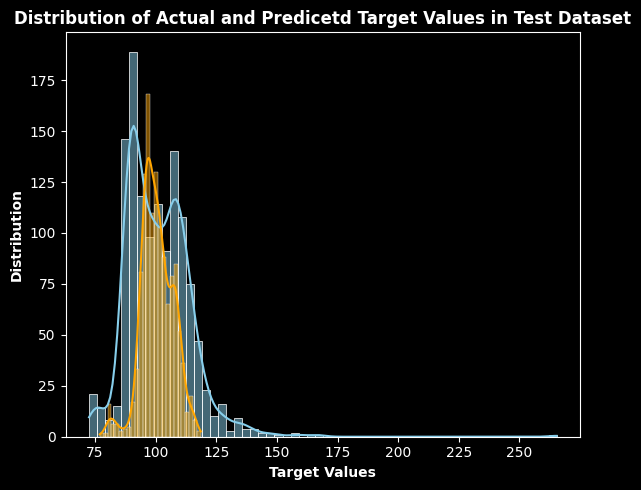

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
pred_test = model.predict(X_test)
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6,5))
plt_test=sns.histplot(y_test, color='skyblue', kde=True) # Actual Value
plt_test=sns.histplot(pred_test, color='orange', kde=True) # Predicted Value
plt_test.set_title("Distribution of Actual and Predicetd Target Values in Test Dataset", weight='bold', size=12)
plt_test.set_xlabel("Target Values", weight='bold', size=10)
plt_test.set_ylabel("Distribution", weight='bold', size=10)
plt.tight_layout()

### 7. K-fold Cross Validation by XGBoost

In [114]:
dmatrix_train = xgb.DMatrix(data=df_x_train_trans, label=df_y_train)
params={'objective': 'reg:squarederror',
        'n_estimator': 300,
        'min_child_weight': 2,
        'max_depth': 3,
        'learning_rate': 0.4,
        'gamma': 1,
        'eta': 0.022,
        'colsample_bytree': 0.4,
        'random_state': 2
       }
model_cv=xgb.cv(dtrain=dmatrix_train, params=params, nfold=3, num_boost_round=50)
model_cv.tail(10)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
40,9.227399,0.119577,10.587542,0.324670
41,9.198968,0.124299,10.582676,0.310861
42,9.174774,0.124371,10.591379,0.318293
43,9.151801,0.133798,10.587678,0.314973
44,9.137347,0.133099,10.579565,0.321893
45,9.109142,0.126182,10.584783,0.325010
46,9.090236,0.129182,10.577726,0.332056
47,9.059553,0.134913,10.582870,0.332527
48,9.039229,0.134689,10.581264,0.337096
49,9.019567,0.128668,10.592213,0.334812


### After performing k-fold validation, RMSE=10.59 being reduced by 17.8%

### 8. Prediction on test dataset using XGBoost Regression.

In [115]:
# LabelEncoding was performed previously for test dataset

In [116]:
test_dataset.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,21,23,34,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,42,3,8,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,21,23,17,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,21,13,34,5,3,31,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,45,20,17,2,3,30,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [117]:
from sklearn.decomposition import PCA

test_dataset.shape

(4209, 359)

In [118]:
test_dataset.dtypes.value_counts()

int64    351
int32      8
Name: count, dtype: int64

In [119]:
pca_dr.fit(test_dataset)

PCA(n_components=0.95, random_state=7)

In [120]:
df_x_test_trans = pca_dr.fit_transform(test_dataset)
df_x_test_trans.shape

(4209, 6)

In [121]:
print(df_x_test_trans)

[[ 14.58336183  14.16672593  13.53857566   2.40835691  11.31942221
    6.94220721]
 [-15.25161267  -7.73675643  -7.45495068  -2.66203503  11.59379316
    1.15940345]
 [ 11.8564649   -1.68017324  -9.9896148   14.91886587  -1.08886021
   -2.69130553]
 ...
 [-13.44644008   3.2885825   -6.85236431  18.91025575  11.32365564
    3.22410016]
 [ 24.92612317  -4.89888683 -10.16941028  11.44337736   5.90178724
    4.55323232]
 [-15.38430989  -7.73425491 -15.4930104   -0.5595126    4.7793639
    1.0829113 ]]


In [122]:
prediction_test=model.predict(df_x_test_trans)
print(prediction_test)

[ 80.58652   95.130806  99.47121  ...  99.76199  118.167885  99.73522 ]


### 9. Plot actual target values of train dataset and predicted target values of test dataset.

In [123]:
# Plot actual values of train dataset and predicted values of test dataset

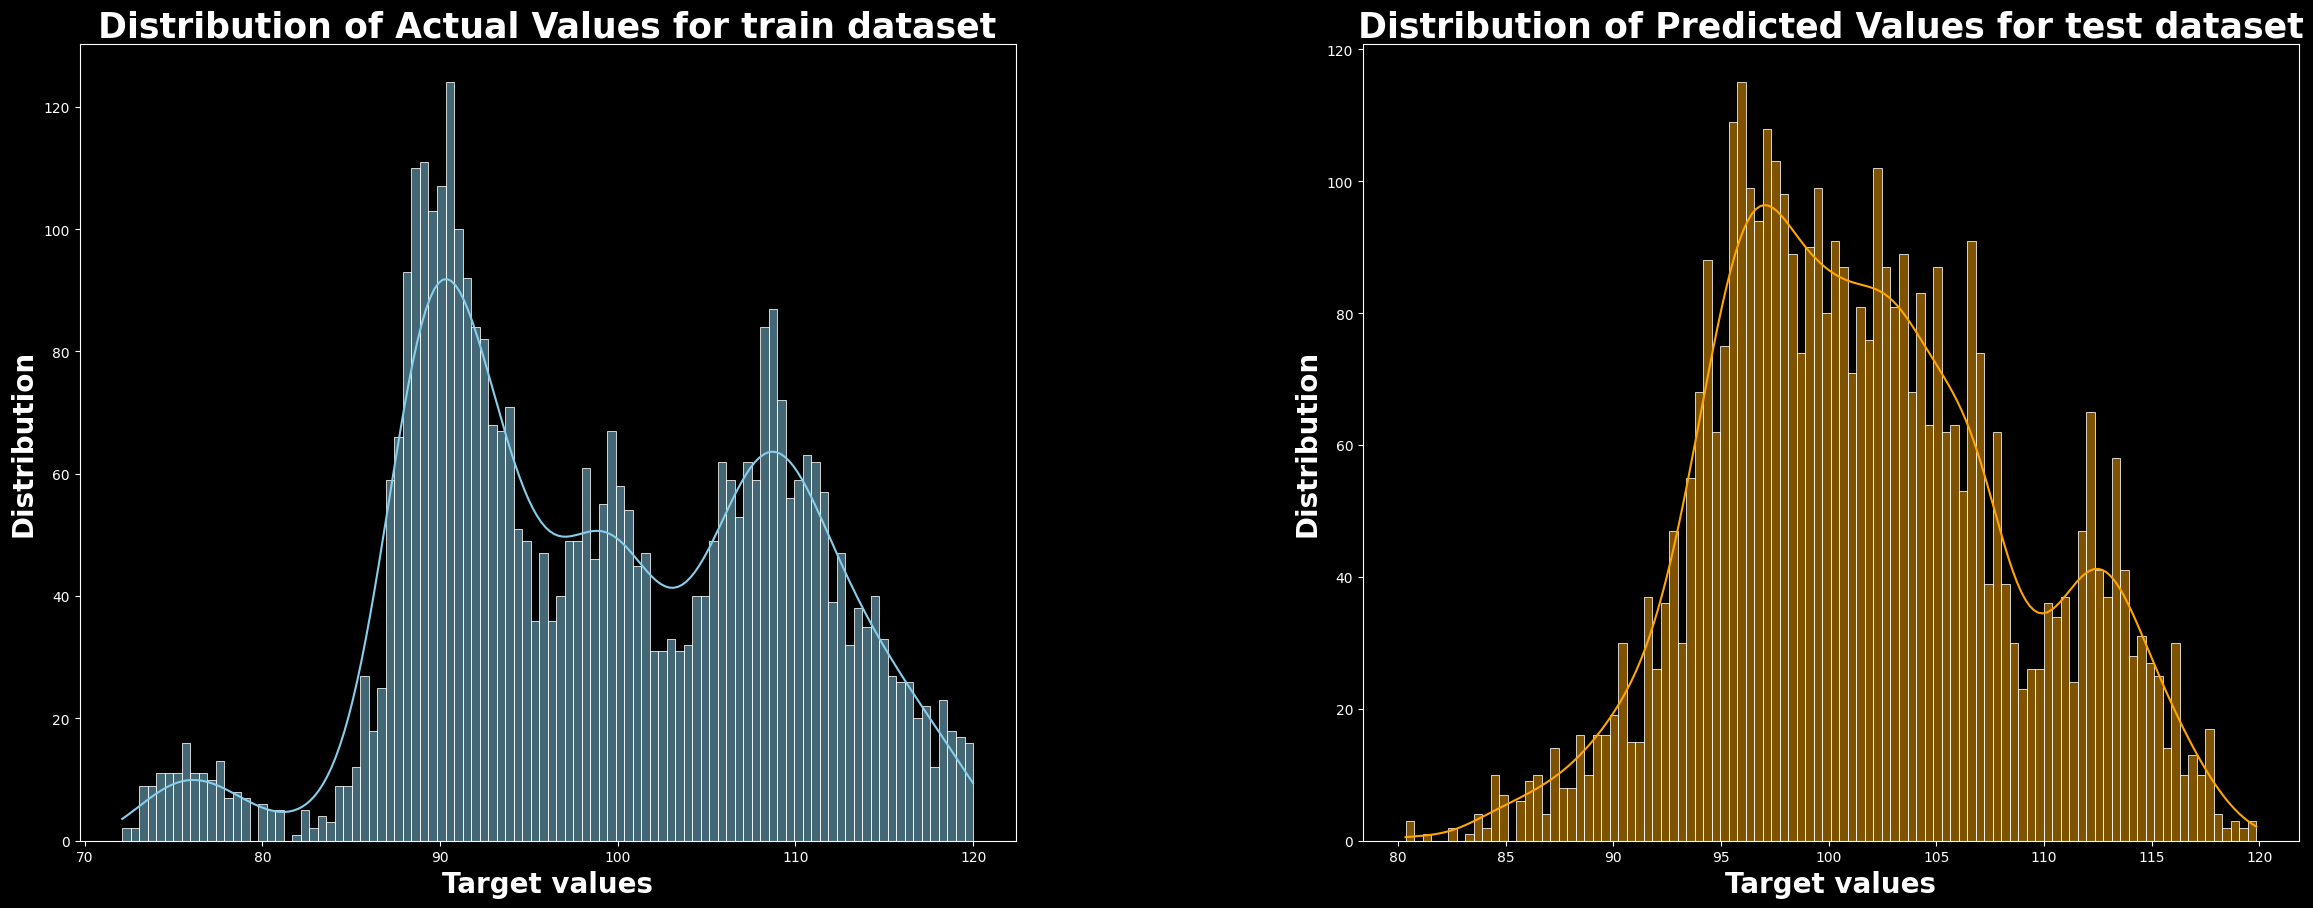

In [127]:
fig, axe = plt.subplots(1, 2, figsize=(24, 10))
# Actual values of train dataset
df_graph_train = df_y_train[df_y_train < 120]
df_graph_pred = prediction_test[prediction_test <120]
plt.style.use('dark_background')
plt_train = sns.histplot(df_graph_train, bins=100, color='skyblue', kde=True, ax=axe[0]) 
plt_train.set_xlabel('Target values', weight='bold', size=20)
plt_train.set_ylabel('Distribution', weight='bold', size=20)
plt_train.set_title('Distribution of Actual Values for train dataset', weight='bold', size=25)
# Predicted values of test dataset
plt_test = sns.histplot(df_graph_pred, bins=100, color='orange', kde=True, ax=axe[1]) # Predicted values
plt_test.set_xlabel('Target values', weight='bold', size=20)
plt_test.set_ylabel('Distribution', weight='bold', size=20)
plt_test.set_title('Distribution of Predicted Values for test dataset', weight='bold', size=25)
plt.tight_layout(w_pad= 20, pad = 4)

### 10. Plot feature importance.

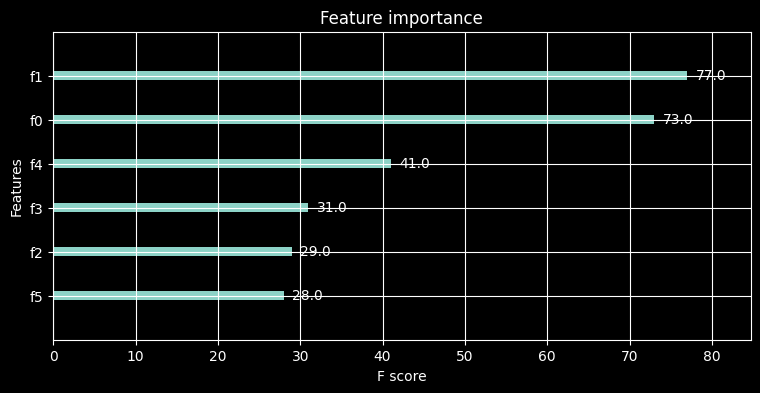

In [125]:
# Plot feature importance using plot_importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.rcParams.update({'font.size': 10})

fig, ax = plt.subplots(figsize=(9,4))
plot_importance(model, max_num_features=6, ax=ax)
plt.show();

Code source : Sun Young Kim

License : BSD 3 clause